In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from tqdm import tqdm

# train set 

In [2]:
# import data
train_FE_ssDM = pd.DataFrame(pd.read_csv('C:/Users/kalin/train_FE_ssDM.csv')) 

In [3]:
train_FE_ssDM 

,Unnamed: 0,Unnamed: 0.1,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_PRODUCT_COMBINATION_nan_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_nan_MEAN
0,0,0,100002,1,0,0,0,-9461,-637,-3648.0,...,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1,1,100003,0,1,0,1,-16765,-1188,-1186.0,...,0.0,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.0,0.0
2,2,2,100004,0,0,1,0,-19046,-225,-4260.0,...,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,3,3,100006,0,1,0,0,-19005,-3039,-9833.0,...,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.714286,0.142857,0.0,0.0
4,4,4,100007,0,0,0,0,-19932,-3038,-4311.0,...,0.0,0.0,0.200000,0.000000,0.200000,0.400000,0.200000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252128,252128,252128,456248,0,1,0,0,-16705,-7258,-9798.0,...,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.0,0.0
252129,252129,252129,456251,0,0,0,1,-9327,-236,-8456.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0
252130,252130,252130,456253,0,1,0,0,-14966,-7921,-6737.0,...,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.0,0.0
252131,252131,252131,456254,1,1,0,0,-11961,-4786,-2562.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [4]:
train_FE_ssDM = train_FE_ssDM.drop(columns=['Unnamed: 0'])

In [5]:
count = train_FE_ssDM.isnull().sum().sort_values(ascending=False)
percentage = ((train_FE_ssDM.isnull().sum()/len(train_FE_ssDM)*100)).sort_values(ascending=False)
missing = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values s:')
missing

Count and percentage of missing values s:


,Count,Percentage
Unnamed: 0.1,0,0.0
PREV_CODE_REJECT_REASON_CLIENT_MEAN,0,0.0
PREV_NAME_CASH_LOAN_PURPOSE_Buying a new car_MEAN,0,0.0
PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN,0,0.0
PREV_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_MEAN,0,0.0
...,...,...
ORGANIZATION_TYPE_Business Entity Type 3,0,0.0
ORGANIZATION_TYPE_Business Entity Type 2,0,0.0
ORGANIZATION_TYPE_Business Entity Type 1,0,0.0
ORGANIZATION_TYPE_Bank,0,0.0


In [6]:
#filtre des valeurs constantes min=max enlever

cols_to_drop=[]

for col in train_FE_ssDM.columns :
    is_const = train_FE_ssDM[col].min() == train_FE_ssDM[col].max()
    if is_const :
        cols_to_drop.append(col)
        
train_FE_ssDM = train_FE_ssDM.drop(columns = cols_to_drop)


In [7]:
train_FE_ssDM

,Unnamed: 0.1,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN,PREV_PRODUCT_COMBINATION_POS other with interest_MEAN,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN
0,0,100002,1,0,0,0,-9461,-637,-3648.0,-2120,...,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
1,1,100003,0,1,0,1,-16765,-1188,-1186.0,-291,...,0.0,0.0,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.0
2,2,100004,0,0,1,0,-19046,-225,-4260.0,-2531,...,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,100006,0,1,0,0,-19005,-3039,-9833.0,-2437,...,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.714286,0.142857,0.0
4,4,100007,0,0,0,0,-19932,-3038,-4311.0,-3458,...,0.0,0.0,0.0,0.200000,0.000000,0.200000,0.400000,0.200000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252128,252128,456248,0,1,0,0,-16705,-7258,-9798.0,-259,...,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
252129,252129,456251,0,0,0,1,-9327,-236,-8456.0,-1982,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
252130,252130,456253,0,1,0,0,-14966,-7921,-6737.0,-5150,...,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.0
252131,252131,456254,1,1,0,0,-11961,-4786,-2562.0,-931,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [8]:
train_FE_ssDM.to_csv('C:/Users/kalin/train_FE_ssDM_ss_const.csv')

In [9]:
corr_df = train_FE_ssDM.corr(method='pearson')

In [10]:
corr_df

,Unnamed: 0.1,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN,PREV_PRODUCT_COMBINATION_POS other with interest_MEAN,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN
Unnamed: 0.1,1.000000,1.000000,-0.001412,-0.000128,0.002168,0.001034,-0.001458,-0.000103,0.000506,-0.000122,...,0.001836,0.003146,0.001059,0.002067,-0.000139,-0.000659,0.001702,0.001122,0.000080,-0.000965
SK_ID_CURR,1.000000,1.000000,-0.001412,-0.000130,0.002171,0.001037,-0.001454,-0.000101,0.000506,-0.000118,...,0.001837,0.003146,0.001056,0.002065,-0.000140,-0.000664,0.001699,0.001124,0.000079,-0.000963
TARGET,-0.001412,-0.001412,1.000000,-0.049206,-0.031891,0.002734,0.065758,0.074957,0.036089,0.039910,...,-0.008598,-0.001984,-0.000095,0.007372,0.007149,-0.008403,-0.009139,0.005064,0.002303,0.005870
CODE_GENDER,-0.000128,-0.000130,-0.049206,1.000000,-0.330269,-0.036574,-0.065353,-0.092562,-0.044104,0.060248,...,-0.016373,-0.029723,0.008966,0.004463,0.002770,-0.005061,-0.011363,0.011317,0.010635,0.008700
FLAG_OWN_CAR,0.002168,0.002171,-0.031891,-0.330269,1.000000,-0.009941,0.040052,0.023114,0.057587,-0.040920,...,0.022162,0.032186,-0.006368,0.001562,0.005662,-0.002130,0.006952,-0.006880,-0.003507,0.000636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,-0.000659,-0.000664,-0.008403,-0.005061,-0.002130,-0.005075,0.000743,-0.011757,-0.007848,-0.009937,...,0.018047,0.000436,-0.000178,-0.143034,-0.149861,1.000000,-0.113066,-0.146586,-0.147869,-0.148816
PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,0.001702,0.001699,-0.009139,-0.011363,0.006952,-0.004609,0.040817,0.005181,0.007333,-0.000471,...,0.033682,-0.001736,0.006128,-0.132288,-0.127628,-0.113066,1.000000,-0.131464,-0.132467,-0.133010
PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,0.001122,0.001124,0.005064,0.011317,-0.006880,-0.014386,-0.013335,-0.008345,-0.005151,-0.000183,...,0.006394,0.010754,0.007688,-0.120301,-0.122696,-0.146586,-0.131464,1.000000,-0.122281,-0.119189
PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,0.000080,0.000079,0.002303,0.010635,-0.003507,-0.018014,-0.015017,-0.004883,-0.002133,-0.000300,...,0.003658,0.014391,0.000156,-0.125669,-0.115409,-0.147869,-0.132467,-0.122281,1.000000,-0.117585


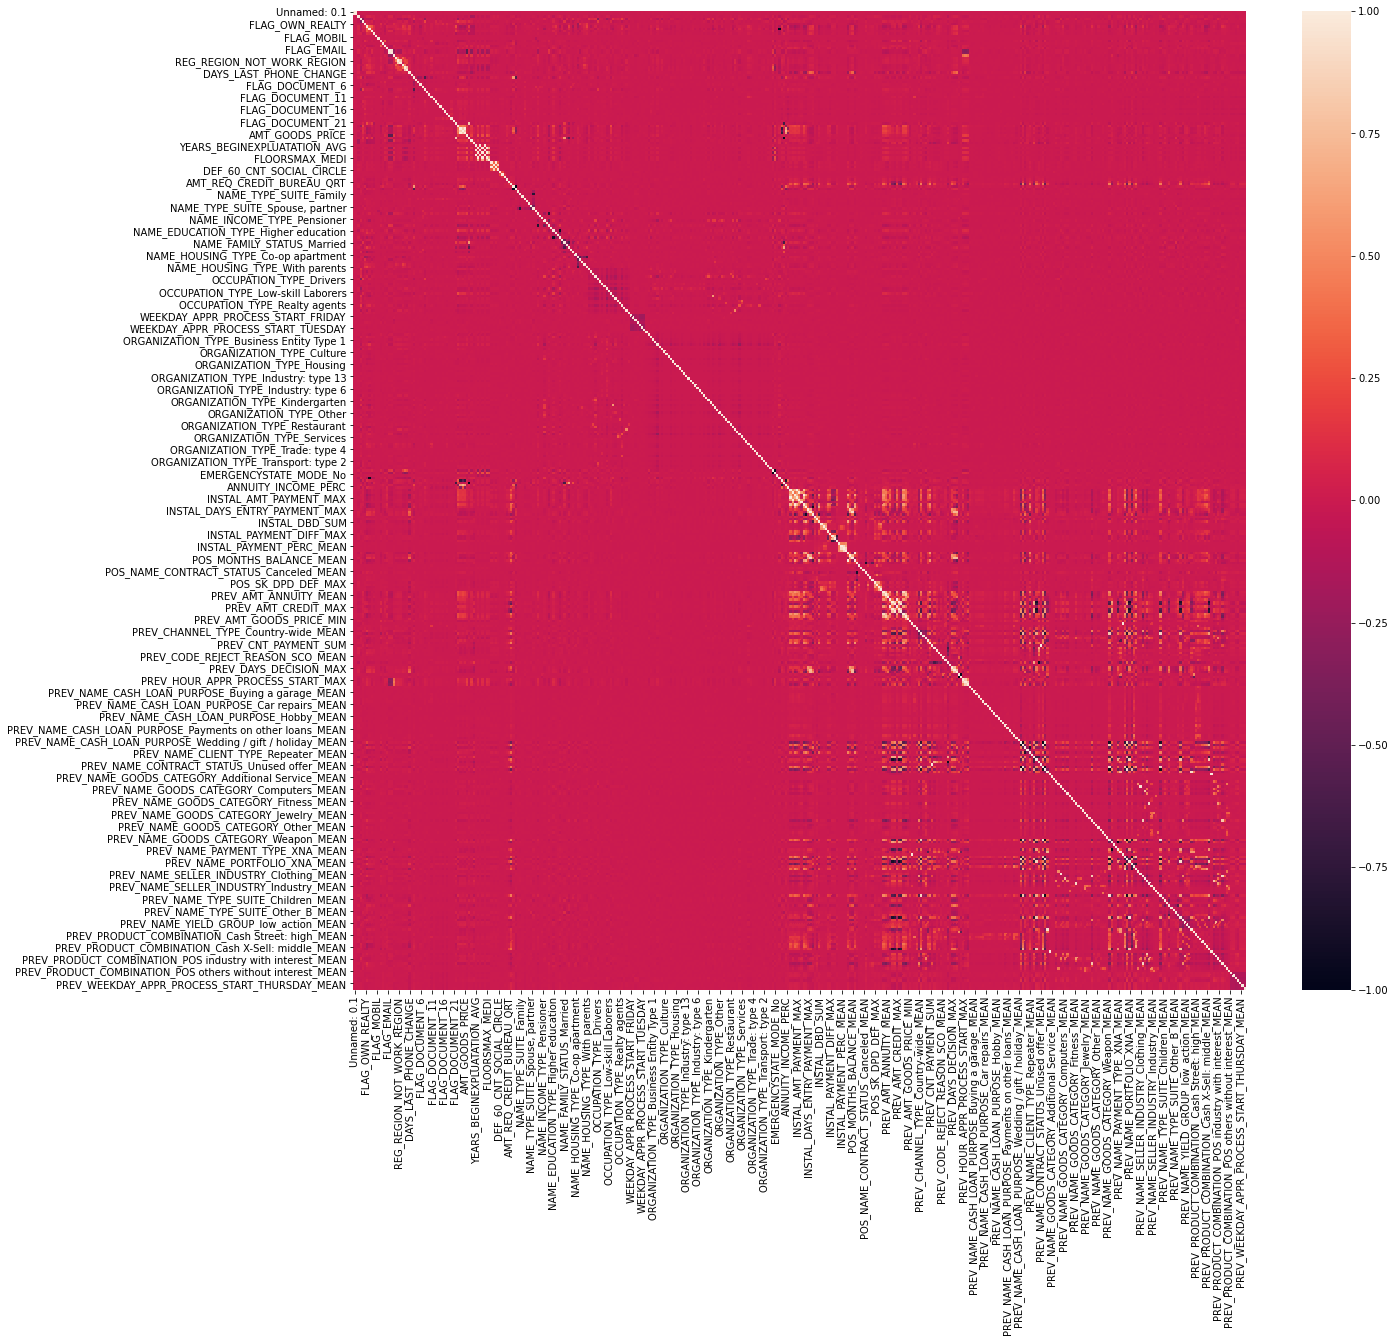

In [11]:
plt.figure(figsize=(20, 18))
sns.heatmap(corr_df,vmin = -1 , vmax = 1 )
plt.show()

In [12]:
# Filtre de corrélation 

var_a=[]


with tqdm(total=len(corr_df.columns)**2) as pbar: #barre pour le temps d'execution

    for col in corr_df.columns:
        for ligne in corr_df[col].iteritems():
            index,valeur = ligne 
            high_corr = abs(valeur)> 0.90  
            if high_corr and col!=index:
                
                var_a.append([col,index,valeur])
            pbar.update()    


100%|██████████| 162409/162409 [00:00<00:00, 1066900.85it/s]


In [13]:
var_corr = pd.DataFrame(var_a,columns=['var_col','var_ind', 'val_cor' ])
var_corr

,var_col,var_ind,val_cor
0,Unnamed: 0.1,SK_ID_CURR,1.000000
1,SK_ID_CURR,Unnamed: 0.1,1.000000
2,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,-0.954680
3,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950318
4,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950318
...,...,...,...
87,PREV_NAME_SELLER_INDUSTRY_XNA_MEAN,PREV_NAME_GOODS_CATEGORY_XNA_MEAN,0.928147
88,PREV_NAME_SELLER_INDUSTRY_XNA_MEAN,PREV_NAME_PORTFOLIO_POS_MEAN,-0.900320
89,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_PORTFOLIO_XNA_MEAN,0.933225
90,PREV_PRODUCT_COMBINATION_Card Street_MEAN,PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN,0.933003


In [14]:
train_FE_ssDM

,Unnamed: 0.1,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN,PREV_PRODUCT_COMBINATION_POS other with interest_MEAN,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN
0,0,100002,1,0,0,0,-9461,-637,-3648.0,-2120,...,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
1,1,100003,0,1,0,1,-16765,-1188,-1186.0,-291,...,0.0,0.0,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.0
2,2,100004,0,0,1,0,-19046,-225,-4260.0,-2531,...,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,100006,0,1,0,0,-19005,-3039,-9833.0,-2437,...,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.714286,0.142857,0.0
4,4,100007,0,0,0,0,-19932,-3038,-4311.0,-3458,...,0.0,0.0,0.0,0.200000,0.000000,0.200000,0.400000,0.200000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252128,252128,456248,0,1,0,0,-16705,-7258,-9798.0,-259,...,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
252129,252129,456251,0,0,0,1,-9327,-236,-8456.0,-1982,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
252130,252130,456253,0,1,0,0,-14966,-7921,-6737.0,-5150,...,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.0
252131,252131,456254,1,1,0,0,-11961,-4786,-2562.0,-931,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# débug 

In [15]:
train_FE_ssDM.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [16]:
indices_to_keep = ~train_FE_ssDM.isin([np.nan, np.inf, -np.inf]).any(1)
#sc.fit_transform(train_FE_ssDM[indices_to_keep].astype(np.float64))

In [17]:
train_FE_ssDM.columns[train_FE_ssDM[~indices_to_keep].isin([np.nan, np.inf, -np.inf]).any()]

Index(['INSTAL_PAYMENT_PERC_MAX', 'INSTAL_PAYMENT_PERC_MEAN',
       'INSTAL_PAYMENT_PERC_SUM'],
      dtype='object')

In [18]:
error = train_FE_ssDM[~indices_to_keep][['INSTAL_PAYMENT_PERC_MAX', 'INSTAL_PAYMENT_PERC_MEAN',
       'INSTAL_PAYMENT_PERC_SUM']]
error

,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM
2140,inf,inf,inf
3154,inf,inf,inf
4652,inf,inf,inf
18014,inf,inf,inf
30599,inf,inf,inf
38161,inf,inf,inf
48356,inf,inf,inf
49714,inf,inf,inf
64905,inf,inf,inf
69624,inf,inf,inf


In [19]:
error2 = error.reset_index()
error2

,index,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM
0,2140,inf,inf,inf
1,3154,inf,inf,inf
2,4652,inf,inf,inf
3,18014,inf,inf,inf
4,30599,inf,inf,inf
5,38161,inf,inf,inf
6,48356,inf,inf,inf
7,49714,inf,inf,inf
8,64905,inf,inf,inf
9,69624,inf,inf,inf


In [20]:
train_FE_ssDM = train_FE_ssDM.drop( error2['index'], axis='index' )
train_FE_ssDM

,Unnamed: 0.1,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN,PREV_PRODUCT_COMBINATION_POS other with interest_MEAN,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN
0,0,100002,1,0,0,0,-9461,-637,-3648.0,-2120,...,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
1,1,100003,0,1,0,1,-16765,-1188,-1186.0,-291,...,0.0,0.0,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.0
2,2,100004,0,0,1,0,-19046,-225,-4260.0,-2531,...,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,100006,0,1,0,0,-19005,-3039,-9833.0,-2437,...,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.714286,0.142857,0.0
4,4,100007,0,0,0,0,-19932,-3038,-4311.0,-3458,...,0.0,0.0,0.0,0.200000,0.000000,0.200000,0.400000,0.200000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252128,252128,456248,0,1,0,0,-16705,-7258,-9798.0,-259,...,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
252129,252129,456251,0,0,0,1,-9327,-236,-8456.0,-1982,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
252130,252130,456253,0,1,0,0,-14966,-7921,-6737.0,-5150,...,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.0
252131,252131,456254,1,1,0,0,-11961,-4786,-2562.0,-931,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [21]:
#suppression des variables trop correllées 

In [22]:
train_FE_ssDM = train_FE_ssDM.drop(var_corr['var_col'], axis='columns')
train_FE_ssDM

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN,PREV_PRODUCT_COMBINATION_POS other with interest_MEAN,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN
0,1,0,0,0,-9461,-3648.0,-2120,1,1,0,...,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
1,0,1,0,1,-16765,-1186.0,-291,1,1,0,...,0.0,0.0,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.0
2,0,0,1,0,-19046,-4260.0,-2531,1,1,1,...,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0,1,0,0,-19005,-9833.0,-2437,1,1,0,...,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.714286,0.142857,0.0
4,0,0,0,0,-19932,-4311.0,-3458,1,1,0,...,0.0,0.0,0.0,0.200000,0.000000,0.200000,0.400000,0.200000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252128,0,1,0,0,-16705,-9798.0,-259,1,1,0,...,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
252129,0,0,0,1,-9327,-8456.0,-1982,1,1,0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
252130,0,1,0,0,-14966,-6737.0,-5150,1,1,0,...,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.0
252131,1,1,0,0,-11961,-2562.0,-931,1,1,0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [23]:
train_FE_ssDM.to_csv('C:/Users/kalin/train_FE_ssDM_final.csv')

# Test set 

In [24]:
# import data

test_FE_ssDM = pd.DataFrame(pd.read_csv('C:/Users/kalin/test_FE_ssDM.csv'))
test_FE_ssDM = test_FE_ssDM.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1','Unnamed: 0.1.1.1'])
test_FE_ssDM 

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,INSTAL_PAYMENT_PERC_MAX,INSTAL_DBD_SUM,INSTAL_DBD_MEAN,INSTAL_DBD_MAX,INSTAL_DPD_SUM,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_PAYMENT_PERC_SUM,INSTAL_COUNT
0,100001,0,0,0,-19241,-2329,-5170.0,-812,1,1,...,1.0,62.0,8.857143,36.0,11.0,1.571429,11.0,2.0,7.0,7.0
1,100005,1,0,0,-18064,-4469,-9118.0,-1623,1,1,...,1.0,213.0,23.666667,37.0,1.0,0.111111,1.0,2.0,9.0,9.0
2,100013,1,1,0,-20038,-4458,-2175.0,-3503,1,1,...,1.0,887.0,5.722581,38.0,84.0,0.541935,21.0,3.0,145.0,155.0
3,100028,0,0,0,-13976,-1866,-2000.0,-4208,1,1,...,1.0,369.0,3.265487,19.0,30.0,0.265487,7.0,3.0,103.0,113.0
4,100038,1,1,1,-13040,-2191,-4000.0,-4262,1,1,...,1.0,147.0,12.250000,18.0,0.0,0.000000,0.0,1.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39465,456221,0,0,0,-19970,-5169,-9094.0,-3399,1,1,...,1.0,22.0,7.333333,8.0,0.0,0.000000,0.0,2.0,3.0,3.0
39466,456222,0,0,1,-11186,-1149,-3015.0,-3003,1,1,...,1.0,438.0,6.000000,26.0,38.0,0.520548,19.0,1.0,70.0,73.0
39467,456223,0,1,0,-15922,-3037,-2681.0,-1504,1,1,...,1.0,253.0,31.625000,76.0,0.0,0.000000,0.0,2.0,8.0,8.0
39468,456224,1,0,1,-13968,-2731,-1461.0,-1364,1,1,...,1.0,211.0,7.275862,15.0,1.0,0.034483,1.0,1.0,29.0,29.0


In [25]:
count = test_FE_ssDM.isnull().sum().sort_values(ascending=False)
percentage = ((test_FE_ssDM.isnull().sum()/len(test_FE_ssDM)*100)).sort_values(ascending=False)
missing = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values s:')
missing

Count and percentage of missing values s:


,Count,Percentage
SK_ID_CURR,0,0.0
PREV_NAME_CASH_LOAN_PURPOSE_Buying a home_MEAN,0,0.0
PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN,0,0.0
PREV_NAME_CONTRACT_TYPE_XNA_MEAN,0,0.0
PREV_NAME_CASH_LOAN_PURPOSE_Money for a third person_MEAN,0,0.0
...,...,...
ORGANIZATION_TYPE_Industry: type 12,0,0.0
ORGANIZATION_TYPE_Industry: type 11,0,0.0
ORGANIZATION_TYPE_Industry: type 10,0,0.0
ORGANIZATION_TYPE_Industry: type 1,0,0.0


In [26]:
#filtre des valeurs constantes min=max enlever

cols_to_drop=[]

for col in test_FE_ssDM.columns :
    is_const = test_FE_ssDM[col].min() == test_FE_ssDM[col].max()
    if is_const :
        cols_to_drop.append(col)
        
test_FE_ssDM = test_FE_ssDM.drop(columns = cols_to_drop)

In [27]:
test_FE_ssDM 

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,INSTAL_PAYMENT_PERC_MAX,INSTAL_DBD_SUM,INSTAL_DBD_MEAN,INSTAL_DBD_MAX,INSTAL_DPD_SUM,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_PAYMENT_PERC_SUM,INSTAL_COUNT
0,100001,0,0,0,-19241,-2329,-5170.0,-812,1,0,...,1.0,62.0,8.857143,36.0,11.0,1.571429,11.0,2.0,7.0,7.0
1,100005,1,0,0,-18064,-4469,-9118.0,-1623,1,0,...,1.0,213.0,23.666667,37.0,1.0,0.111111,1.0,2.0,9.0,9.0
2,100013,1,1,0,-20038,-4458,-2175.0,-3503,1,0,...,1.0,887.0,5.722581,38.0,84.0,0.541935,21.0,3.0,145.0,155.0
3,100028,0,0,0,-13976,-1866,-2000.0,-4208,1,0,...,1.0,369.0,3.265487,19.0,30.0,0.265487,7.0,3.0,103.0,113.0
4,100038,1,1,1,-13040,-2191,-4000.0,-4262,1,1,...,1.0,147.0,12.250000,18.0,0.0,0.000000,0.0,1.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39465,456221,0,0,0,-19970,-5169,-9094.0,-3399,1,1,...,1.0,22.0,7.333333,8.0,0.0,0.000000,0.0,2.0,3.0,3.0
39466,456222,0,0,1,-11186,-1149,-3015.0,-3003,1,0,...,1.0,438.0,6.000000,26.0,38.0,0.520548,19.0,1.0,70.0,73.0
39467,456223,0,1,0,-15922,-3037,-2681.0,-1504,1,0,...,1.0,253.0,31.625000,76.0,0.0,0.000000,0.0,2.0,8.0,8.0
39468,456224,1,0,1,-13968,-2731,-1461.0,-1364,1,1,...,1.0,211.0,7.275862,15.0,1.0,0.034483,1.0,1.0,29.0,29.0


In [28]:
corr_df = test_FE_ssDM.corr(method='pearson')
corr_df

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,INSTAL_PAYMENT_PERC_MAX,INSTAL_DBD_SUM,INSTAL_DBD_MEAN,INSTAL_DBD_MAX,INSTAL_DPD_SUM,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_PAYMENT_PERC_SUM,INSTAL_COUNT
SK_ID_CURR,1.000000,-0.002541,0.001566,0.006432,0.002210,0.000497,0.001128,-0.005824,-0.000946,-0.002699,...,-0.000485,-0.003882,-0.002155,-0.009212,0.004245,0.006045,0.003011,-0.005156,-0.000501,-0.001424
CODE_GENDER,-0.002541,1.000000,0.308854,0.010067,0.091669,0.090377,0.041683,-0.034839,0.003825,-0.009735,...,-0.000357,-0.033921,0.016158,-0.003018,-0.016229,-0.011297,-0.014497,-0.037956,-0.010811,-0.047036
FLAG_OWN_CAR,0.001566,0.308854,1.000000,-0.020240,0.037748,0.018903,0.053550,-0.032071,0.003886,-0.020339,...,0.006562,-0.013007,-0.006195,0.000521,-0.003905,-0.001387,-0.001608,0.002402,0.004117,-0.010655
FLAG_OWN_REALTY,0.006432,0.010067,-0.020240,1.000000,0.077134,0.002031,-0.000084,-0.043921,0.003502,0.238976,...,-0.000931,-0.018441,0.009537,-0.008830,0.007111,0.005405,0.008988,-0.039010,-0.004662,-0.018608
DAYS_BIRTH,0.002210,0.091669,0.037748,0.077134,1.000000,0.359851,0.276530,0.082499,-0.005236,0.053108,...,-0.006784,-0.121496,0.044122,-0.009269,-0.033225,-0.011182,-0.027445,-0.072465,-0.041941,-0.167085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INSTAL_DPD_MEAN,0.006045,-0.011297,-0.001387,0.005405,-0.011182,-0.008253,-0.006846,0.002858,0.000606,0.002496,...,0.005735,-0.006344,-0.032287,0.024020,0.757905,1.000000,0.696606,0.004188,0.012045,0.004685
INSTAL_DPD_MAX,0.003011,-0.014497,-0.001608,0.008988,-0.027445,-0.022235,-0.011411,-0.007797,0.000787,-0.000093,...,0.017974,0.048424,-0.042238,0.045386,0.770810,0.696606,1.000000,0.032541,0.040058,0.077905
INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,-0.005156,-0.037956,0.002402,-0.039010,-0.072465,-0.027414,-0.019937,-0.021403,0.001068,-0.044098,...,0.046257,0.243615,-0.054476,0.094263,0.042614,0.004188,0.032541,1.000000,0.130094,0.297499
INSTAL_PAYMENT_PERC_SUM,-0.000501,-0.010811,0.004117,-0.004662,-0.041941,-0.030448,-0.021941,-0.017814,0.000913,-0.011985,...,0.972557,0.150624,-0.060312,0.047781,0.051197,0.012045,0.040058,0.130094,1.000000,0.228284


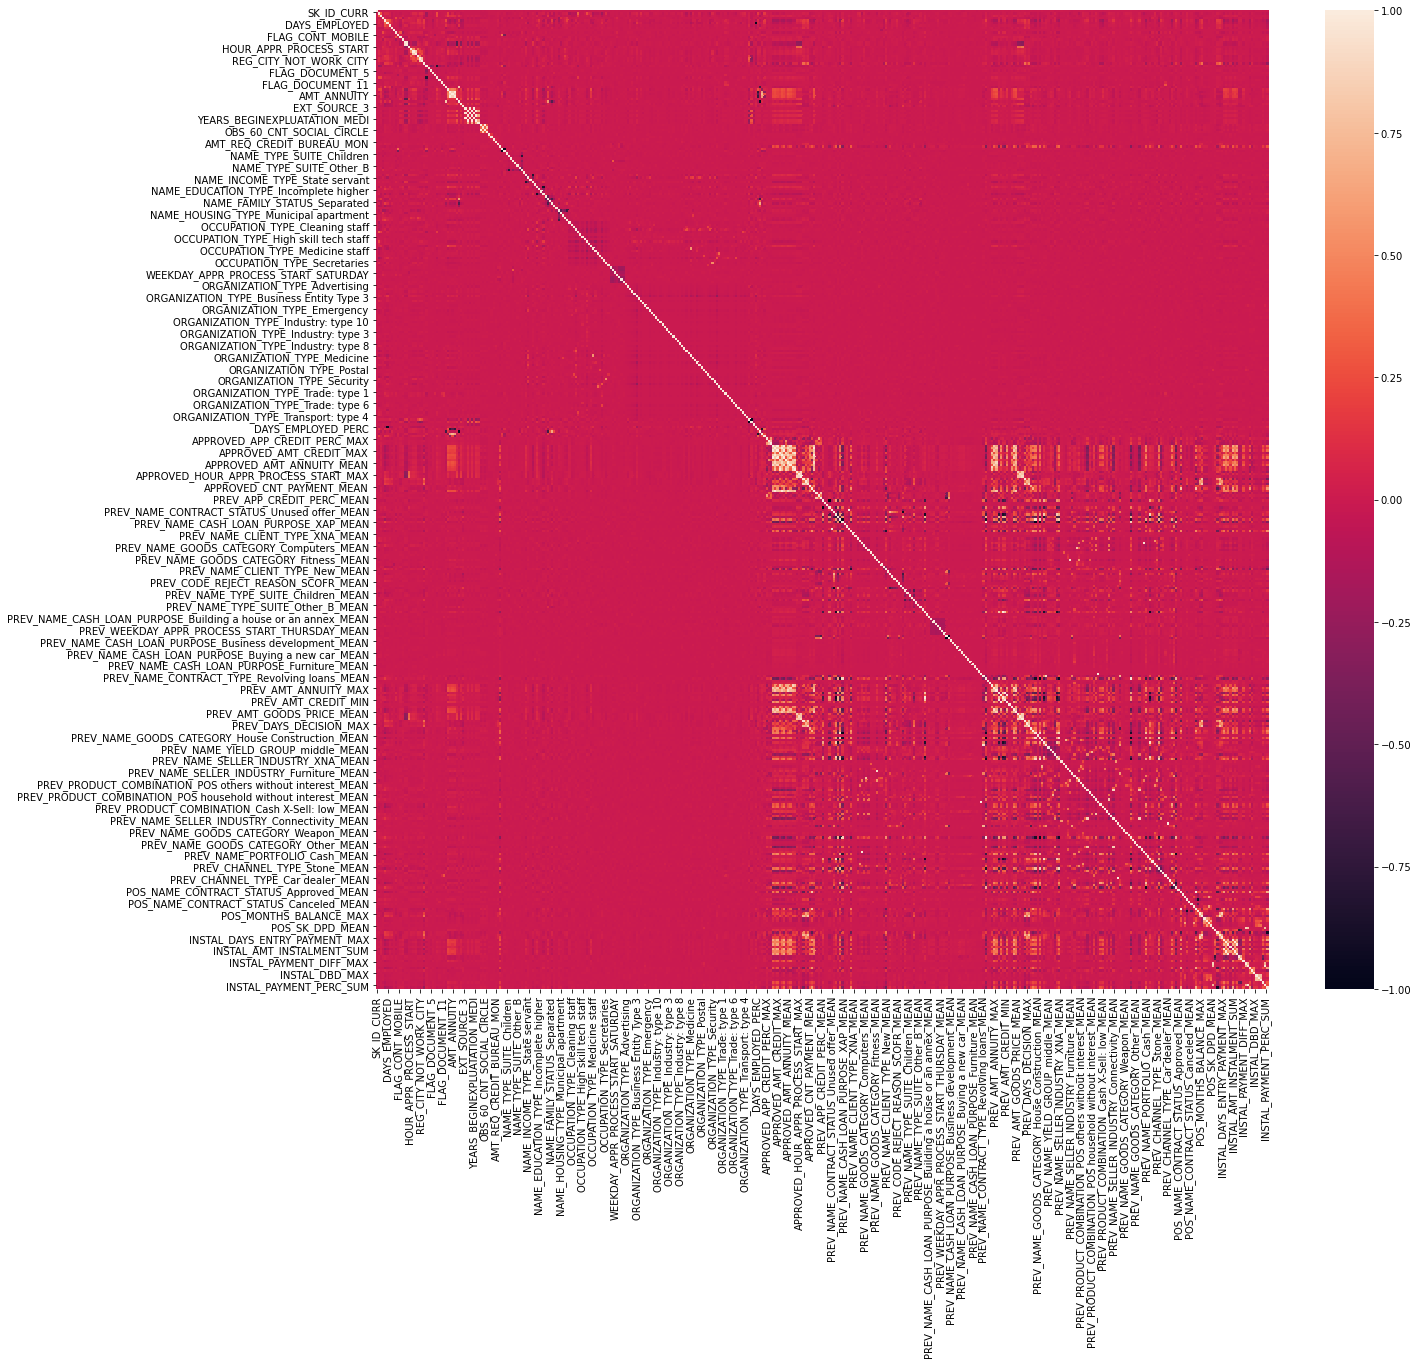

In [29]:
plt.figure(figsize=(20, 18))
sns.heatmap(corr_df,vmin = -1 , vmax = 1 )
plt.show()

In [30]:
# Filtre de corrélation 

var_a=[]


with tqdm(total=len(corr_df.columns)**2) as pbar: #barre pour le temps d'execution

    for col in corr_df.columns:
        for ligne in corr_df[col].iteritems():
            index,valeur = ligne 
            high_corr = abs(valeur)> 0.90  
            if high_corr and col!=index:
                
                var_a.append([col,index,valeur])
            pbar.update() 

100%|██████████| 169744/169744 [00:00<00:00, 796435.89it/s]


In [31]:
var_corr = pd.DataFrame(var_a,columns=['var_col','var_ind', 'val_cor' ])
var_corr

,var_col,var_ind,val_cor
0,DAYS_EMPLOYED,DAYS_EMPLOYED_PERC,-0.953599
1,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.940003
2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.940003
3,AMT_CREDIT,AMT_GOODS_PRICE,0.988977
4,AMT_GOODS_PRICE,AMT_CREDIT,0.988977
...,...,...,...
113,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_PAYMENT_MEAN,0.978891
114,INSTAL_AMT_INSTALMENT_MAX,INSTAL_AMT_PAYMENT_MAX,0.999159
115,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_SUM,0.972557
116,INSTAL_PAYMENT_PERC_SUM,INSTAL_PAYMENT_PERC_MAX,0.972557


In [32]:
test_FE_ssDM.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [33]:
indices_to_keep = ~test_FE_ssDM.isin([np.nan, np.inf, -np.inf]).any(1)

In [34]:
test_FE_ssDM.columns[test_FE_ssDM[~indices_to_keep].isin([np.nan, np.inf, -np.inf]).any()]

Index(['INSTAL_PAYMENT_PERC_MEAN', 'INSTAL_PAYMENT_PERC_MAX',
       'INSTAL_PAYMENT_PERC_SUM'],
      dtype='object')

In [35]:
error = test_FE_ssDM[~indices_to_keep][['INSTAL_PAYMENT_PERC_MAX', 'INSTAL_PAYMENT_PERC_MEAN',
       'INSTAL_PAYMENT_PERC_SUM']]
error

,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM
1992,inf,inf,inf
2279,inf,inf,inf
6944,inf,inf,inf
9393,inf,inf,inf
17871,inf,inf,inf
18793,inf,inf,inf
21003,inf,inf,inf
22416,inf,inf,inf
22917,inf,inf,inf
30925,inf,inf,inf


In [36]:
error2 = error.reset_index()
error2

,index,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM
0,1992,inf,inf,inf
1,2279,inf,inf,inf
2,6944,inf,inf,inf
3,9393,inf,inf,inf
4,17871,inf,inf,inf
5,18793,inf,inf,inf
6,21003,inf,inf,inf
7,22416,inf,inf,inf
8,22917,inf,inf,inf
9,30925,inf,inf,inf


In [37]:
test_FE_ssDM = test_FE_ssDM.drop( error2['index'], axis='index' )
test_FE_ssDM

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,INSTAL_PAYMENT_PERC_MAX,INSTAL_DBD_SUM,INSTAL_DBD_MEAN,INSTAL_DBD_MAX,INSTAL_DPD_SUM,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_PAYMENT_PERC_SUM,INSTAL_COUNT
0,100001,0,0,0,-19241,-2329,-5170.0,-812,1,0,...,1.0,62.0,8.857143,36.0,11.0,1.571429,11.0,2.0,7.0,7.0
1,100005,1,0,0,-18064,-4469,-9118.0,-1623,1,0,...,1.0,213.0,23.666667,37.0,1.0,0.111111,1.0,2.0,9.0,9.0
2,100013,1,1,0,-20038,-4458,-2175.0,-3503,1,0,...,1.0,887.0,5.722581,38.0,84.0,0.541935,21.0,3.0,145.0,155.0
3,100028,0,0,0,-13976,-1866,-2000.0,-4208,1,0,...,1.0,369.0,3.265487,19.0,30.0,0.265487,7.0,3.0,103.0,113.0
4,100038,1,1,1,-13040,-2191,-4000.0,-4262,1,1,...,1.0,147.0,12.250000,18.0,0.0,0.000000,0.0,1.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39465,456221,0,0,0,-19970,-5169,-9094.0,-3399,1,1,...,1.0,22.0,7.333333,8.0,0.0,0.000000,0.0,2.0,3.0,3.0
39466,456222,0,0,1,-11186,-1149,-3015.0,-3003,1,0,...,1.0,438.0,6.000000,26.0,38.0,0.520548,19.0,1.0,70.0,73.0
39467,456223,0,1,0,-15922,-3037,-2681.0,-1504,1,0,...,1.0,253.0,31.625000,76.0,0.0,0.000000,0.0,2.0,8.0,8.0
39468,456224,1,0,1,-13968,-2731,-1461.0,-1364,1,1,...,1.0,211.0,7.275862,15.0,1.0,0.034483,1.0,1.0,29.0,29.0


In [38]:
#supression des variables trop corréllées 
test_FE_ssDM = test_FE_ssDM.drop(var_corr['var_col'], axis='columns')
test_FE_ssDM

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_DBD_SUM,INSTAL_DBD_MEAN,INSTAL_DBD_MAX,INSTAL_DPD_SUM,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE
0,100001,0,0,0,-19241,-5170.0,-812,1,0,1,...,0.000,0.00,1.000000,62.0,8.857143,36.0,11.0,1.571429,11.0,2.0
1,100005,1,0,0,-18064,-9118.0,-1623,1,0,1,...,0.000,0.00,1.000000,213.0,23.666667,37.0,1.0,0.111111,1.0,2.0
2,100013,1,1,0,-20038,-2175.0,-3503,1,0,1,...,179437.725,23147.82,0.935484,887.0,5.722581,38.0,84.0,0.541935,21.0,3.0
3,100028,0,0,0,-13976,-2000.0,-4208,1,0,1,...,70348.230,8505.00,0.911504,369.0,3.265487,19.0,30.0,0.265487,7.0,3.0
4,100038,1,1,1,-13040,-4000.0,-4262,1,1,1,...,0.000,0.00,1.000000,147.0,12.250000,18.0,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39465,456221,0,0,0,-19970,-9094.0,-3399,1,1,1,...,0.000,0.00,1.000000,22.0,7.333333,8.0,0.0,0.000000,0.0,2.0
39466,456222,0,0,1,-11186,-3015.0,-3003,1,0,1,...,22974.165,9680.49,0.958904,438.0,6.000000,26.0,38.0,0.520548,19.0,1.0
39467,456223,0,1,0,-15922,-2681.0,-1504,1,0,1,...,0.000,0.00,1.000000,253.0,31.625000,76.0,0.0,0.000000,0.0,2.0
39468,456224,1,0,1,-13968,-1461.0,-1364,1,1,1,...,0.000,0.00,1.000000,211.0,7.275862,15.0,1.0,0.034483,1.0,1.0


# Mêmes variables dans train et test 

In [39]:
train_FE_ssDM

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN,PREV_PRODUCT_COMBINATION_POS other with interest_MEAN,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN
0,1,0,0,0,-9461,-3648.0,-2120,1,1,0,...,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
1,0,1,0,1,-16765,-1186.0,-291,1,1,0,...,0.0,0.0,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.0
2,0,0,1,0,-19046,-4260.0,-2531,1,1,1,...,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0,1,0,0,-19005,-9833.0,-2437,1,1,0,...,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.714286,0.142857,0.0
4,0,0,0,0,-19932,-4311.0,-3458,1,1,0,...,0.0,0.0,0.0,0.200000,0.000000,0.200000,0.400000,0.200000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252128,0,1,0,0,-16705,-9798.0,-259,1,1,0,...,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
252129,0,0,0,1,-9327,-8456.0,-1982,1,1,0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
252130,0,1,0,0,-14966,-6737.0,-5150,1,1,0,...,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.0
252131,1,1,0,0,-11961,-2562.0,-931,1,1,0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [40]:
test_FE_ssDM

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_DBD_SUM,INSTAL_DBD_MEAN,INSTAL_DBD_MAX,INSTAL_DPD_SUM,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE
0,100001,0,0,0,-19241,-5170.0,-812,1,0,1,...,0.000,0.00,1.000000,62.0,8.857143,36.0,11.0,1.571429,11.0,2.0
1,100005,1,0,0,-18064,-9118.0,-1623,1,0,1,...,0.000,0.00,1.000000,213.0,23.666667,37.0,1.0,0.111111,1.0,2.0
2,100013,1,1,0,-20038,-2175.0,-3503,1,0,1,...,179437.725,23147.82,0.935484,887.0,5.722581,38.0,84.0,0.541935,21.0,3.0
3,100028,0,0,0,-13976,-2000.0,-4208,1,0,1,...,70348.230,8505.00,0.911504,369.0,3.265487,19.0,30.0,0.265487,7.0,3.0
4,100038,1,1,1,-13040,-4000.0,-4262,1,1,1,...,0.000,0.00,1.000000,147.0,12.250000,18.0,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39465,456221,0,0,0,-19970,-9094.0,-3399,1,1,1,...,0.000,0.00,1.000000,22.0,7.333333,8.0,0.0,0.000000,0.0,2.0
39466,456222,0,0,1,-11186,-3015.0,-3003,1,0,1,...,22974.165,9680.49,0.958904,438.0,6.000000,26.0,38.0,0.520548,19.0,1.0
39467,456223,0,1,0,-15922,-2681.0,-1504,1,0,1,...,0.000,0.00,1.000000,253.0,31.625000,76.0,0.0,0.000000,0.0,2.0
39468,456224,1,0,1,-13968,-1461.0,-1364,1,1,1,...,0.000,0.00,1.000000,211.0,7.275862,15.0,1.0,0.034483,1.0,1.0


In [41]:
test_columns = test_FE_ssDM.columns
#colonnes de test_FE_ssDM qui sont dans train_FE_ssDM
asupp_ds_test = test_FE_ssDM.columns.isin(train_FE_ssDM.columns)
d = {'test_columns': test_columns, 'col2': asupp_ds_test}
asupp_ds_test2 = pd.DataFrame(data=d)
#colonnes de test_FE_ssDM qui ne sont pas dans train_FE_ssDM
asupp_ds_test2 = asupp_ds_test2[asupp_ds_test2['col2'] == False]
asupp_ds_test2

,test_columns,col2
0,SK_ID_CURR,False
160,APPROVED_APP_CREDIT_PERC_MAX,False
161,APPROVED_APP_CREDIT_PERC_MIN,False
162,APPROVED_APP_CREDIT_PERC_MEAN,False
163,APPROVED_AMT_APPLICATION_MIN,False
164,APPROVED_AMT_ANNUITY_MEAN,False
165,APPROVED_AMT_ANNUITY_MIN,False
166,APPROVED_HOUR_APPR_PROCESS_START_MIN,False
167,APPROVED_HOUR_APPR_PROCESS_START_MAX,False
168,APPROVED_DAYS_DECISION_MAX,False


In [42]:
#colonnes de test_FE_ssDM qui sont  dans train_FE_ssDM

test_FE_ssDM =test_FE_ssDM.drop(asupp_ds_test2['test_columns'], axis='columns')
test_FE_ssDM

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,...,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_PAYMENT_DIFF_MAX,INSTAL_DBD_SUM,INSTAL_DBD_MEAN,INSTAL_DBD_MAX,INSTAL_DPD_SUM,INSTAL_DPD_MEAN,INSTAL_DPD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE
0,0,0,0,-19241,-5170.0,-812,1,0,1,0,...,0.000000,0.000,0.00,62.0,8.857143,36.0,11.0,1.571429,11.0,2.0
1,1,0,0,-18064,-9118.0,-1623,1,0,1,0,...,0.000000,0.000,0.00,213.0,23.666667,37.0,1.0,0.111111,1.0,2.0
2,1,1,0,-20038,-2175.0,-3503,1,0,1,0,...,1157.662742,179437.725,23147.82,887.0,5.722581,38.0,84.0,0.541935,21.0,3.0
3,0,0,0,-13976,-2000.0,-4208,1,0,1,1,...,622.550708,70348.230,8505.00,369.0,3.265487,19.0,30.0,0.265487,7.0,3.0
4,1,1,1,-13040,-4000.0,-4262,1,1,1,0,...,0.000000,0.000,0.00,147.0,12.250000,18.0,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39465,0,0,0,-19970,-9094.0,-3399,1,1,1,1,...,0.000000,0.000,0.00,22.0,7.333333,8.0,0.0,0.000000,0.0,2.0
39466,0,0,1,-11186,-3015.0,-3003,1,0,1,0,...,314.714589,22974.165,9680.49,438.0,6.000000,26.0,38.0,0.520548,19.0,1.0
39467,0,1,0,-15922,-2681.0,-1504,1,0,1,1,...,0.000000,0.000,0.00,253.0,31.625000,76.0,0.0,0.000000,0.0,2.0
39468,1,0,1,-13968,-1461.0,-1364,1,1,1,1,...,0.000000,0.000,0.00,211.0,7.275862,15.0,1.0,0.034483,1.0,1.0


In [43]:
train_columns = train_FE_ssDM.columns
#colonnes de train_FE_ssDM qui sont dans test_FE_ssDM
asupp_ds_train = train_FE_ssDM.columns.isin(test_FE_ssDM.columns)
d = {'train_columns': train_columns, 'col2': asupp_ds_train}
asupp_ds_train2 = pd.DataFrame(data=d)
#colonnes de train_FE_ssDM qui ne sont PAS dans test_FE_ssDM
asupp_ds_train2 = asupp_ds_train2.drop(asupp_ds_train2[ asupp_ds_train2['train_columns'] == 'TARGET'].index)
asupp_ds_train2 = asupp_ds_train2[asupp_ds_train2['col2'] == False]
asupp_ds_train2

,train_columns,col2
7,FLAG_MOBIL,False
21,FLAG_DOCUMENT_2,False
29,FLAG_DOCUMENT_10,False
31,FLAG_DOCUMENT_12,False
32,FLAG_DOCUMENT_13,False
33,FLAG_DOCUMENT_14,False
34,FLAG_DOCUMENT_15,False
35,FLAG_DOCUMENT_16,False
36,FLAG_DOCUMENT_17,False
38,FLAG_DOCUMENT_19,False


In [44]:
#colonnes de train_FE_ssDM qui sont  dans test_FE_ssDM

train_FE_ssDM =train_FE_ssDM.drop(columns= (asupp_ds_train2['train_columns']))
train_FE_ssDM

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,PREV_PRODUCT_COMBINATION_POS mobile without interest_MEAN,PREV_PRODUCT_COMBINATION_POS other with interest_MEAN,PREV_PRODUCT_COMBINATION_POS others without interest_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_MEAN,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_MEAN
0,1,0,0,0,-9461,-3648.0,-2120,1,0,1,...,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
1,0,1,0,1,-16765,-1186.0,-291,1,0,1,...,0.0,0.0,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,0.000000,0.0
2,0,0,1,0,-19046,-4260.0,-2531,1,1,1,...,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0,1,0,0,-19005,-9833.0,-2437,1,0,1,...,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.714286,0.142857,0.0
4,0,0,0,0,-19932,-4311.0,-3458,1,0,1,...,0.0,0.0,0.0,0.200000,0.000000,0.200000,0.400000,0.200000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252128,0,1,0,0,-16705,-9798.0,-259,1,0,1,...,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,0.0
252129,0,0,0,1,-9327,-8456.0,-1982,1,0,1,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
252130,0,1,0,0,-14966,-6737.0,-5150,1,0,1,...,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.0
252131,1,1,0,0,-11961,-2562.0,-931,1,0,1,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [46]:
train_FE_ssDM.to_csv('C:/Users/kalin/train_FE_ssDM_final.csv')
test_FE_ssDM.to_csv('C:/Users/kalin/test_FE_ssDM_final.csv')